# Lab Exercise 1: EDA On Titanic Dataset

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Desc,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,Adult,0,0,373450,8.0500,NaN,S


## Initial Observations

The dataset contains various columns, including passenger information and attributes related to their journey on the Titanic. Some of the key columns are:

- PassengerId: Identifier for each passenger
- Survived: Whether the passenger survived (1) or not (0)
- Pclass: Passenger class
- Name: Name of the passenger
- Sex: Gender of the passenger
- Age: Age of the passenger
- Desc: Descriptive category based on age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare paid
- Cabin: Cabin number
- Embarked: Port of embarkation

## Checking for and filling Missing Values

In [4]:

missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data[missing_data['Missing Values'] > 0]


,Missing Values,Percentage
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


- From the above line, we can see that the *age* feature has 20% of it's entries as NULL, hence we can fill the missing data with it's mean values.
- We can see that a majority of the *Cabin* feature is missing, so we can create a new feaute to highlight if the value is present or not.
- Since *embarked* has only 2 missing entries, we can simply fill the most common value of embarked in their place

In [5]:
# For Age, using the median age for imputation
data['Age'].fillna(data['Age'].median(), inplace=True)

# For Cabin, creating a binary indicator: 1 for missing, 0 for present
data['Cabin_Indicator'] = data['Cabin'].isnull().astype(int)

# For Embarked, imputing with the mode (most common value)
most_common_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(most_common_embarked, inplace=True)


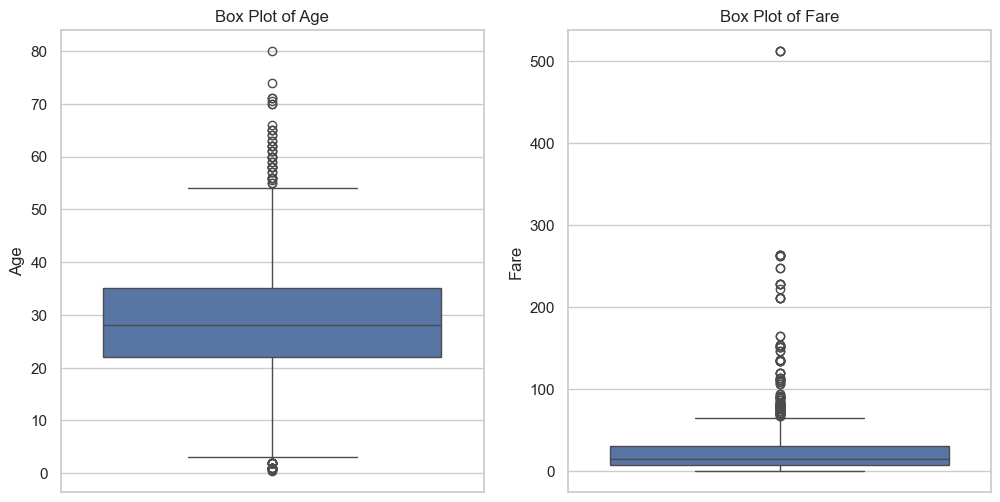

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualisation style
sns.set(style="whitegrid")

# Creating box plots for Age and Fare to identify outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Age'])
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Fare'])
plt.title('Box Plot of Fare')

plt.show()

## Outlier Analysis Results
The box plots provide the following insights:

- Age: The box plot for Age shows a few outliers on the higher end. However, these do not appear to be extreme. Since age can naturally vary among passengers, these outliers may be valid data points.
- Fare: The box plot for Fare reveals several outliers, with some fares significantly higher than the rest. These could represent premium tickets or special cabins.

## Handling Outliers
- Age: Given the nature of the data, it might be reasonable to keep these outliers as they represent valid age variations.
- Fare: We can transform the Fare column using a log transformation to reduce the impact of extreme values.

## Log Transformation of Fare
The box plot of the log-transformed Fare shows a more normalized distribution, with the extreme values less pronounced. This transformation makes the data more suitable for analysis, especially for models sensitive to outliers.

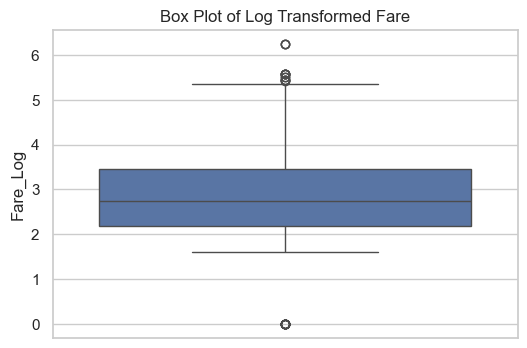

In [9]:
# Applying log transformation to the Fare column to reduce the impact of extreme values
# Adding 1 to accommodate zero fares (log(0) is undefined)
data['Fare_Log'] = np.log(data['Fare'] + 1)

# Visualizing the transformed Fare data
plt.figure(figsize=(6, 4))
sns.boxplot(y=data['Fare_Log'])
plt.title('Box Plot of Log Transformed Fare')
plt.show()
